## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [91]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [92]:
# Go to the directory where the data file is located. 
#os.chdir(r'~~')                # Please, replace the path with your own.  

In [93]:
# you forgot to provide the data set, i had to download it from kaggle
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [94]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [96]:
# Categories of 'supp'. 
supp_categories = df["supp"].unique()
supp_categories

array(['VC', 'OJ'], dtype=object)

In [97]:
# Group by category.
groups = df.groupby('supp')

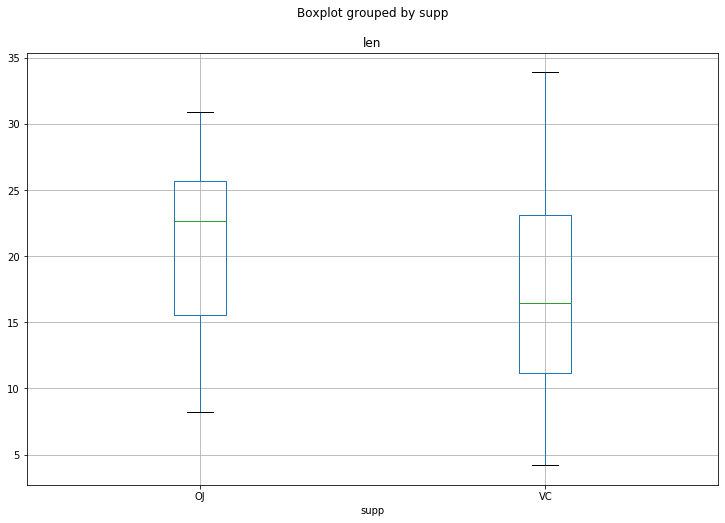

In [98]:
# Multiple Boxplots.
df.boxplot('len', by='supp', figsize=(12, 8))

In [99]:
# ANOVA.
f_stat, p_value = st.f_oneway(groups.get_group("VC").len , groups.get_group("OJ").len)

print("f-statictic  :",  f_stat)
print("p-value :", p_value)

f-statictic  : 3.6682525410709697
p-value : 0.060393371224128745


In [100]:
# Result summary.
"""
We can see that the p-value is 6%, and 6% > 5% so  we cannot reject the null hypothesis.
"""

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [101]:
# Categories of 'dose'. 
dose_categories = df["dose"].unique()
dose_categories

array([0.5, 1. , 2. ])

In [102]:
# Group by category.
groups_dose = df.groupby('dose')

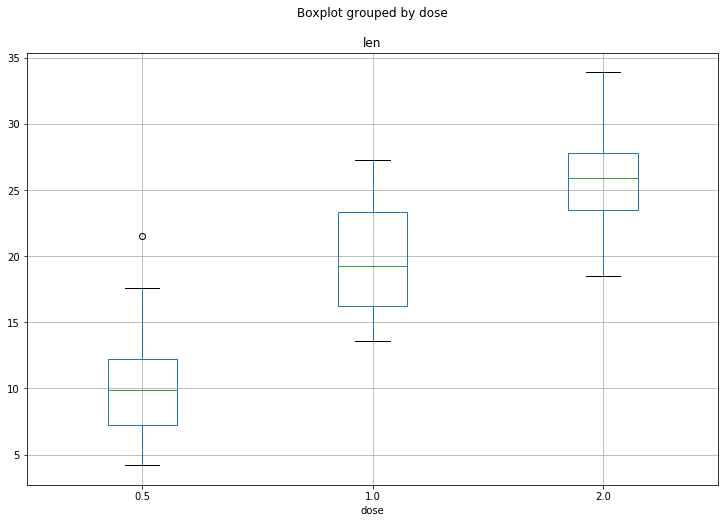

In [103]:
# Multiple Boxplots.
df.boxplot('len', by='dose', figsize=(12, 8))

In [104]:
# ANOVA.
f_stat, p_value = st.f_oneway(groups_dose.get_group(0.5).len , groups_dose.get_group(1).len, groups_dose.get_group(2).len)

print("f-statictic  :",  f_stat)
print("p-value :", p_value)

f-statictic  : 67.41573785674247
p-value : 9.532727011699946e-16


In [105]:
# Result summary.
"""
We can see that the p-value is very small 9*10^-16 < 0,05 (alpha), so we reject the null hypothesis H0.
the alternative hypothesis H1 is true. which states that there is difference in means.
"""